# Imports

In [1]:
import cv2
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from PIL import Image
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Load Dataset

In [73]:
real_images_dir = 'D:\Face_fake_detection\Data_files/full_ds/real'
fake_images_dir = 'D:\Face_fake_detection\Data_files/full_ds/fake'

# Image Count

In [74]:
real_images_count = len(os.listdir(real_images_dir))
fake_images_count = len(os.listdir(fake_images_dir))

print(f"Number of Real Images: {real_images_count}")
print(f"Number of Fake Images: {fake_images_count}")


Number of Real Images: 1081
Number of Fake Images: 960


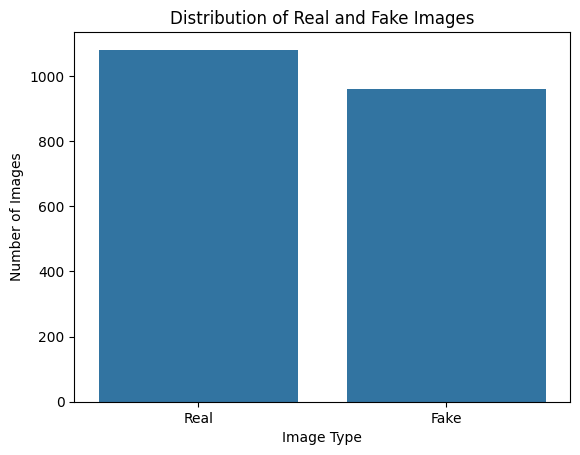

In [75]:
labels = ['Real', 'Fake']
counts = [real_images_count, fake_images_count]

sns.barplot(x=labels, y=counts)
plt.title('Distribution of Real and Fake Images')
plt.ylabel('Number of Images')
plt.xlabel('Image Type')
plt.show()


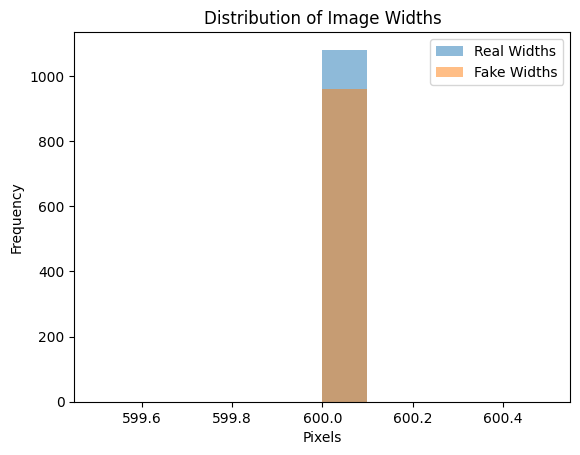

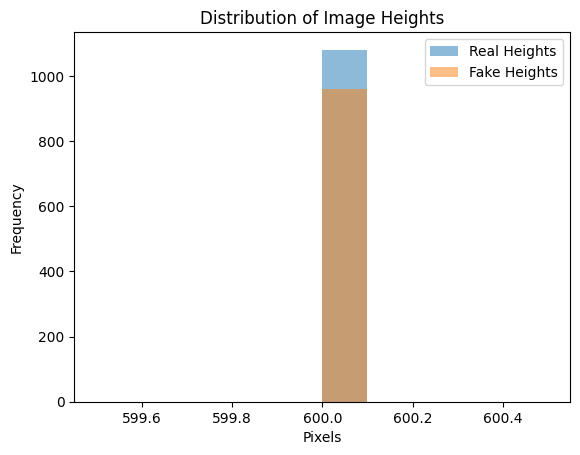

In [76]:
real_sizes = [Image.open(os.path.join(real_images_dir, file)).size for file in os.listdir(real_images_dir)]
fake_sizes = [Image.open(os.path.join(fake_images_dir, file)).size for file in os.listdir(fake_images_dir)]

real_widths, real_heights = zip(*real_sizes)
fake_widths, fake_heights = zip(*fake_sizes)

plt.hist(real_widths, bins=10, alpha=0.5, label='Real Widths')
plt.hist(fake_widths, bins=10, alpha=0.5, label='Fake Widths')
plt.title('Distribution of Image Widths')
plt.xlabel('Pixels')
plt.ylabel('Frequency')
plt.legend()
plt.show()

plt.hist(real_heights, bins=10, alpha=0.5, label='Real Heights')
plt.hist(fake_heights, bins=10, alpha=0.5, label='Fake Heights')
plt.title('Distribution of Image Heights')
plt.xlabel('Pixels')
plt.ylabel('Frequency')
plt.legend()
plt.show()


# Visualize Sample Images

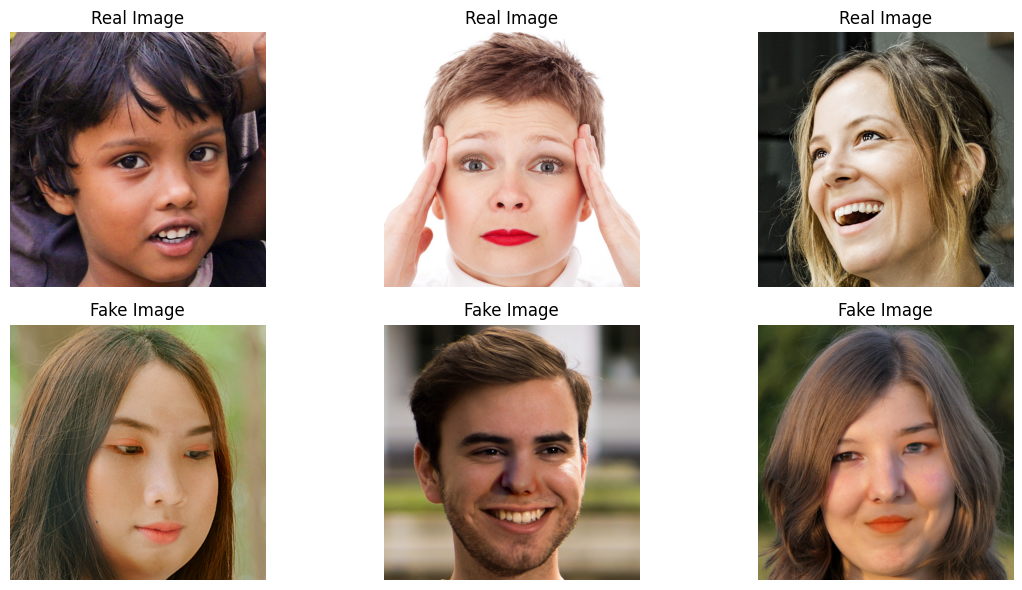

In [77]:
plt.figure(figsize=(12, 6))

# Display real images
for i, file in enumerate(os.listdir(real_images_dir)[:3]):
    img = Image.open(os.path.join(real_images_dir, file))
    plt.subplot(2, 3, i+1)
    plt.imshow(img)
    plt.title('Real Image')
    plt.axis('off')

# Display fake images
for i, file in enumerate(os.listdir(fake_images_dir)[:3]):
    img = Image.open(os.path.join(fake_images_dir, file))
    plt.subplot(2, 3, i+4)
    plt.imshow(img)
    plt.title('Fake Image')
    plt.axis('off')

plt.tight_layout()
plt.show()


In [2]:
# split_ds_dir = r'D:\Face_fake_detection\Data_files\split_ds'
split_ds_dir = r'D:\Face_fake_detection\Data_files/full_ds'

# Load images and labels
def load_images_labels(base_dir):
    images = []
    labels = []
    
    for cls in ["real", "fake"]:
        # cls_dir = os.path.join(base_dir, 'training', cls)
        cls_dir = os.path.join(base_dir, cls)
        if not os.path.exists(cls_dir):
            print(f"Directory does not exist: {cls_dir}") 
            continue
        for image_file in os.listdir(cls_dir):
            img_path = os.path.join(cls_dir, image_file)
            img = Image.open(img_path).convert('RGB').resize((50, 50)) 
            img_array = np.array(img).flatten()
            images.append(img_array)
            labels.append(cls)
    
    return np.array(images), np.array(labels)

X, y = load_images_labels(split_ds_dir)

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

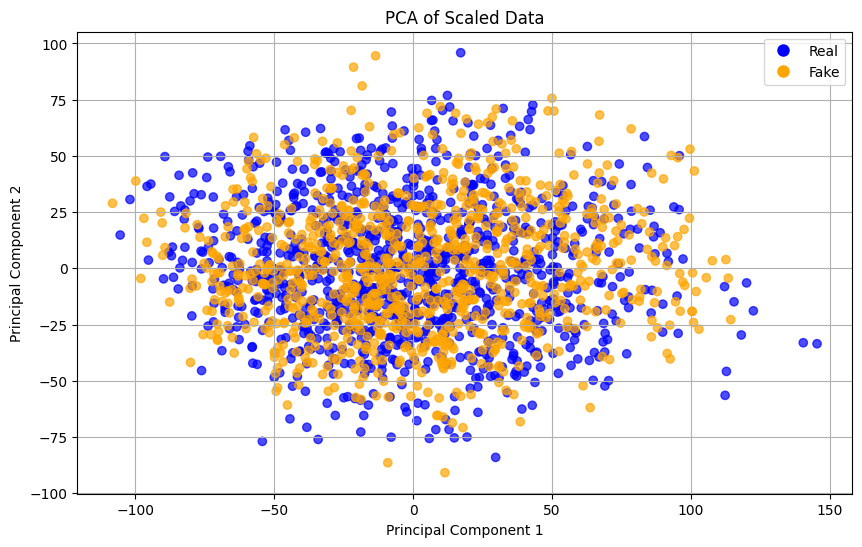

In [4]:
# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot PCA results
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=['blue' if label == 'real' else 'orange' for label in y], alpha=0.7)
plt.title('PCA of Scaled Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()

# Create a legend
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Real'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=10, label='Fake')
])

plt.show()


In [6]:
# Apply PCA with 3 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)



df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])
df_pca['Label'] = ['Real' if label == 'real' else 'Fake' for label in y]

# Plot using Plotly
fig = px.scatter_3d(df_pca, x='PC1', y='PC2', z='PC3', 
                    color='Label', 
                    color_discrete_map={'Real': 'blue', 'Fake': 'orange'},
                    title='3D PCA of Scaled Data')

# Customize axes labels
fig.update_layout(scene=dict(
    xaxis_title='Principal Component 1',
    yaxis_title='Principal Component 2',
    zaxis_title='Principal Component 3'
))

# Show plot
fig.show()


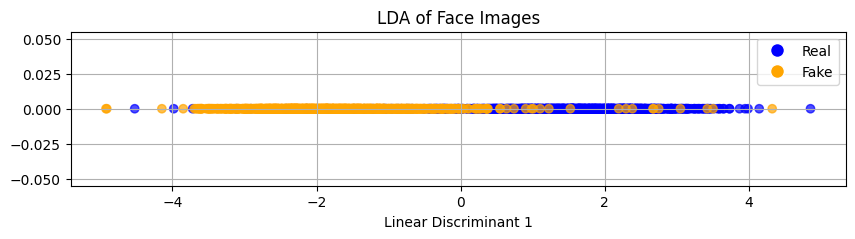

In [8]:
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X_scaled, y)

# Plot LDA results
plt.figure(figsize=(10, 2))
plt.scatter(X_lda, [0] * len(X_lda), c=['blue' if label == 'real' else 'orange' for label in y], alpha=0.7)
plt.title('LDA of Face Images')
plt.xlabel('Linear Discriminant 1')
plt.ylabel('')
plt.grid()

# Create a legend
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Real'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=10, label='Fake')
])

plt.show()

Conclusion
The PCA plot shows the spread of images in the new feature space defined by the principal components.
The LDA plot shows how well the classes can be separated along the linear discriminant.